<a href="https://colab.research.google.com/github/GeorgeThan414/Machine_Learning_CSD/blob/main/Ergasia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Εργασία 1 - Επιβλεπόμενη Μάθηση
Μέρος 1 - Λογιστική Παλινδρόμηση


Το πρώτο κελί αφορά τη φόρτωση όλων των κατάλληλων βιβλιοθηκών, για την ολοκλήρωση της εργασίας. H βιβλιοθήκη **pandas**, αφορά την φόρτωση, επερξεργασία δεδομένων, καθώς και την στατιστική που ακολουθούν. Η βιβλιοθήκη **numpy** αφορά τον μετασχηματισμό των δεδομένων σε πίνακες, με σκοπό την αξιοποίηση τους σε αριθμιτικές πράξεις όπως πρόσθεση, πολλαπλασιασμός και διαίρεση που είναι απαραίτητες για τη μηχανική μάθηση. Επιπλέον, η βιβλιοθήκη **matplotlib** αφορά την απεικόνιση των δεδομένων και τη δυνατότητα χρήσης πολλαπλών και διαφορετικών διαγραμματών. Τέλος, η βιβλιοθήκη **scikit-learn (sklear)**, αποτελεί ίσως την σημαντικότερη και δημοφιλέστερη βιβλιοθήκη που προσφέρει μοντέλα μηχανικής μάθησης στο κοινό της, με σκοπό την αξιοποίησή τους σε διαφορετικά projects και διαφορετικά δεδομένα.


In [65]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Ερώτημα 1**

Μέσω την βιβλιοθήκη pandas που αναφέρθηκε προηγουμένως θα φορτωθούν τα δεδομένα σε μορφή DataFrame. Υπάρχουν πολλαπλοί τρόποι ανεβάσματος δεδομένων, στην συγκεκριμένη περίπτωση θα κατεβάσουμε το dataset και το φορτώσουμε στα files με drag & drop.

Το παρακάτω κελί φορτώνει τα δεδομένα με την εντολή **pd.read_csv** και εκτυπώνουμε τα πρώτα 10 με την εντολή **df.head(10)**, όπου το df είναι το dataframe object που δημιουργήσαμε πρίν.

In [22]:
df=pd.read_csv("diabetes.csv")
df.head(10)



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

Με την εντολή **df.describe()**, εκτυπώνονται όλες οι βασικές στατιστικές ιδιότητες, όπως η μέση τιμή (mean), η τυπική απόκλιση(std) καθώς και η ελάχιστη(min) και μέγιστη(max) τιμή τους, όλων των διαφορετικών χαρακτηριστικών του csv μας.

In [52]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Στη συνέχεια εμφανίζεται το ιστόγραμμα, όλων των διαφορικών χαρακτηριστικών, που μας δείχνει την διακύμανση των δεδομένων στον άξωνα x(axis=0), ή το πόσο πυκνά είναι τα δεδομένα κάθε χαρακτηριστικού. Δηλαδή, αν σε κάποιο χαρακτηριστικό τα δεδομένα έχουν πολύ κοντινές τιμές ή πολλαπλά σημεία έχουν ίδια τιμή, αυτό σημαίνει ότι έχουν μικρή μεταβλητότητα στην τιμή τους και το ιστόγραμμα θα έχει μία κορυφή (peak) στην συγκεκριμένη τιμή. Συνολίκα έχουμε 9 χαρακτηριστικά, οπότε θα δείξουμε 9 διαφορετικά ιστογράμματα.

Παραάτω απεικοίνίζονται τα 8 διαφορετικά ιστογράμματα, για λόγους απλότητα, μία for loop με 8 επαναλήψεις(iterations), που σε κάθε επανάληψη τοποθετεί ένα διαφορετικό χαρακτηριστικό σε συγκεκριμένη θέση του αντικειμένου subplot που θα απεικονίση συνολικά όλα τα ιστογράμματα σε 3 σειρές και 3 στείλες.

Έπειτα, η μεταβλητή target που αποτελείται μόνο από δύο τιμές το 0 και το 1 θα εμφανιστεί με ένα Bar Plot.

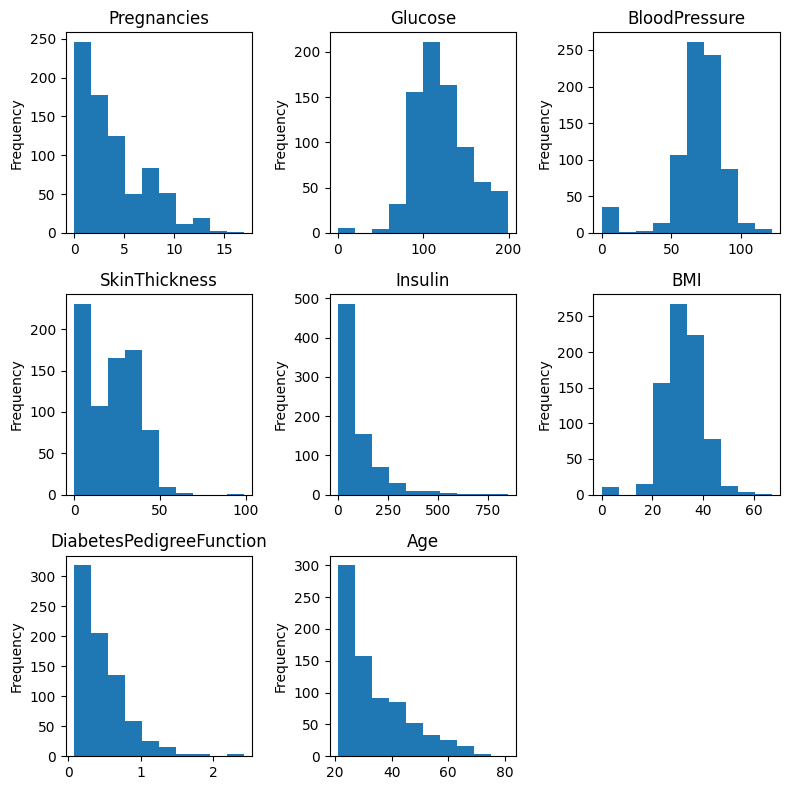

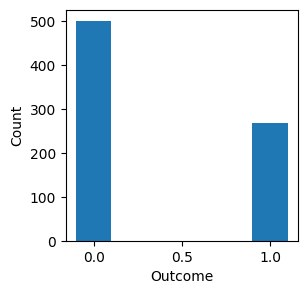

In [48]:
plt.figure(figsize=(8,8))                   # Visualized Object Size
for index in range(8):
  plt.subplot(3,3, index+1)                 # Total rows/columns of the object
  plt.hist(df.iloc[:, index])               # Each row and column depicts exactly one feature.
  plt.ylabel("Frequency")                   # Y label for all the visualizations
  plt.title(df.columns[index])              # Correlate the name of the feature with each subplot position.

plt.tight_layout()                          # Avoid overlap between subplots
plt.show()                                  # Depicts the subplots.

plt.figure(figsize=(3,3))
counts= df['Outcome'].value_counts()        # Count the total values of the feature
plt.bar(counts.index, counts, width=0.2)    # Create a bar plot with the counts and with specified width of the bar plots
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()                                   # Depicts the plot.



**Ερώτημα 2**

Όπως αναφέρθηκε και προηγουμένως, το ιστόγραμμα κάθε μεταβλητής απεικονίζει και την κατανομή που ακολουθεί το συγκεκριμένο χαρακτηστικό, από την συγκέντρωση των δειγμάτων του. Σύφμωνα με τα παραπάνω ιστογράμμα μπορούμε να αντιληφθούμε εμπειρικά την διακύμανση των δεδομένων κάθε χαρακτηριστικού αλλά και αριθμιτικά αν υψώσουμε στο τετράγωνο την τυπική απόκλιση κάθε χαρακτηστικού. **Επομένωνς, όσο μεγαλύτερη διακύμανση τόσο πιο αραιά τα δεδομένα στο ιστόγραμμα, άρα περισσότερη πληροφορία που μπορεί να αξιοποιηθεί από το μοντέλο. Διαφορετικά οι μεταβλητές με μεγαλύτερη ασσυμετρία και απότομες κορυφές(skewness) δεν παρουσιάζουν μεγάλη διακύμανση, με συνέπεια το μοντέλο να μπορεί να σχεδόν μάθει απέξω ότι η τιμή του χαρακτηριστικού είναι η τιμή με τα περισσότερα δείγματα, απομακρύνοντας το μοντέλο από την γενίκευση και ομαλή εκπαίδευση.**

**Ο δεύτερος λόγος** αφορά το χαρακτηριστό στόχου (target=Outcome), το οποίο σύμφωνα με το παραπάνω διάγραμμα μας δείχνει την ανισορροπία των δύο διαφορετικών κλάσεων 0(χωρίς διαβήτη) και 1(με διαβήτη), αφού το 65% των δειγμάτων ταξινομούνται στην κλάση 0, ενώ τα υπόλοιπα στην κλάση 1. Με αποτέλεσμα να δημιουργείται μια μεροληψία των δεδομένων (bias) συγκεκριμένα σε μοντέλα ταξινόμησης, όπως είναι και η παλιδρομηκή ταξινόμηση, τα οποία να τείνουν να προβλέπουν συχνότερα την κλάση με τα περισσότερα δείγματα.

**Συμπερασματικα, και δεδομένου του παρακάτω πίνακος, ο οποίος μας δείχνει τον συνολικό αριθμο μηδενικών στα χαρακτηριστικά, δηλαδή μετρήσεις με μηδενικές τιμές, που δεν ανταποκρίνονται στην πραγματικότητα. Παραδείγματος χάρη η αρτηριακή πίεση στο αίμα έχει 35 μηδενικές τιμές. Έτσι, καταλήγουμε στο συμπέρασμα ότι το σετ δεδομένων δεν αποτελείται από ποιοτικές τιμές.**

In [55]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Ερώτημα 3**

Η κατανομή της μεταβλητής Age είναι δεξιά λοξή (right-skewed) το οποίο επιβεβαιώνεται αφού η διάμεσος (**median=29.000000**) είναι μικρότερη από τη μέση τιμή (**mean= 33.240885**). Επίσης, δεν υπάρχει μεγάλη τυπική απόκλιση (**std=11.760232**), και το μεγαλύτερο πλήθος των δεδομένων βρίσκεται σε άτομα μεταξύ των 20-40 ετών και αρκετά λιγότερα δεδομένα σε άτομα 60 ετών. Συνεπώς, δεν είναι καλή κατανομή για την κατασκευή της συγκεκριμένης εφαρμογής, διότι θα έπρεπε τα δείγματα να είναι ισοκατανεμημένα στις διαφορετικές ηλικίες.

**Ερώτημα 4**

Ένας δείκτης αξιολόγησεις των κλινικών μελετών, αποτελεί η σύγκριση των δειγμάτων του χαρακτηριστικού της γλυκόζης μεταξύ των δύο κλάσεων. Συνεπώς θα υπολογιστεί η μέση τιμή των δειγμάτων της γλυκόζης που έχουν οδηγήσει σε στην κλάση 0 και η μέση τιμή των δειγμάτων της γλυκόζης που έχουν οδηγήσει σε στην κλάση 1. Αν η μέση τιμή των δειγμάτων της γλυκόζης στην κλάση 1 είναι μεγαλύτερη, τότε τα δεδομένα συνάδουν με το αποτέλεσμα της κλινικής μελέτης.

Το παρακάτω κελί κώδικα απεικονίζει αυτές τις μέσες τιμές, οι οποίες μας οδηγούν στην εγκυρότητα του αποτελέσματος των κλινικών μελετών. Δηλαδή ότι ασθενείς με διαβήτη έχουν σημαντικά υψηλότερη μέση τιμή γλυκόζης.


In [58]:
df.groupby('Outcome')['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

**Ερώτημα 5**

In [64]:
# Split the Dataset to inputs(x) and targets(y)
inputs_df= df.drop(columns='Outcome')
targets_df=df['Outcome']


# Convert the above dataframe objects to numpy arrays
x=inputs_df.to_numpy()
y=targets_df.to_numpy()
x.shape, y.shape


((768, 8), (768,))

Χωρισμός των παραπάνω πινάκων σε σύνολα εκπαίδευσης και επικύρωσης (training, validation)

In [110]:
# Define a random seed
seed=0
# Split the data to 70-30
split_size=0.3

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=split_size, random_state=seed)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((537, 8), (231, 8), (537,), (231,))

**Ερώτημα 6**

In [112]:
# Load and use the Logistic Regression Model
model=LogisticRegression(max_iter=1000, random_state=seed)

# Fit the model to the train set.
model.fit(X_train, y_train)
# Calculate the accuracy in the train set with seed=0
X_train_predictions= model.predict(X_train)
print(f" Shapes of the predictions & actual values: {X_train_predictions.shape, y_train_predictions.shape}")
accuracy_of_training=accuracy_score(y_train,X_train_predictions)
print(f"Accuracy of the model in Train set: {accuracy_of_training*100:.2f}%")


 Shapes of the predictions & actual values: ((537,), (537,))
Accuracy of the model in Train set: 76.54%


**Accuacy of the model in Test set**

In [164]:
# Calculate the Accuracy of the model in the test(validation) set.
# In order to calculate the accuracy we need to fit the trained classifier to x_test.
# Then to print the accuracy score of the model.
predictions= model.predict(X_valid)
predictions, predictions.shape     # Predictions must have the same samples as the y_valid (231,) for the calculation of the accuracy score
accuracy= accuracy_score(y_valid, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 77.92%


Η ακρίβεια του μοντέλου στο τεστ σετ είναι **μεγαλύτερη περίπου κατα 1.5%**, το οποίο σημαίνει ότι το μοντέλο έχει συγκλίσει και εκπαιδευτεί σωστά, εφόσον μπορεί να γενικεύση σε καινούρια δείγματα με καλύτερη απόδοση.

**Ερώτημα 7**

Απεικόνιση του ταξινομητή σε διαφορετικές ηλικίες με βάση το τεστ σετ δεδομένων.


In [134]:
# Create a new Dataframe with the three columns: Age, Predictions, Actual values
results= pd.DataFrame({
    "Predicted Values": predictions,
    "Actual Values": y_valid
})
results['Age'] = df.loc[results.index, 'Age']
results= results[['Age', 'Predicted Values', 'Actual Values']]
results


Age  Predicted Values  Actual Values
0     50                 1              1
1     31                 0              0
2     32                 0              0
3     21                 1              1
4     33                 0              0
..   ...               ...            ...
226   26                 0              1
227   24                 0              1
228   31                 0              0
229   24                 0              0
230   22                 0              0

[231 rows x 3 columns]

In [144]:
# Group by [0-25] , [25-50], [50- max] , And create a new column in results dataframe
labels = ['0-25', '25-50', '50+']
bins = [0, 25, 50, results['Age'].max()]
results['AgeGroup'] = pd.cut(results['Age'], bins=bins, labels=labels)
results

Age  Predicted Values  Actual Values AgeGroup
0     50                 1              1    25-50
1     31                 0              0    25-50
2     32                 0              0    25-50
3     21                 1              1     0-25
4     33                 0              0    25-50
..   ...               ...            ...      ...
226   26                 0              1    25-50
227   24                 0              1     0-25
228   31                 0              0    25-50
229   24                 0              0     0-25
230   22                 0              0     0-25

[231 rows x 4 columns]

    Age  Predicted Values  Actual Values AgeGroup
3    21                 1              1     0-25
27   22                 1              0     0-25
32   22                 0              0     0-25
45   25                 0              0     0-25
47   22                 0              1     0-25
    Age  Predicted Values  Actual Values AgeGroup
0   50                 1              1    25-50
1   31                 0              0    25-50
2   32                 0              0    25-50
4   33                 0              0    25-50
5   30                 0              0    25-50
     Age  Predicted Values  Actual Values AgeGroup
8    53                 0              0      50+
9    54                 0              0      50+
12   57                 0              0      50+
13   59                 0              0      50+
14   51                 0              0      50+

Accuracy of group 0-25: 66.22%
Accuracy of group 25-50: 82.58%
Accuracy of group 50+: 88.00%


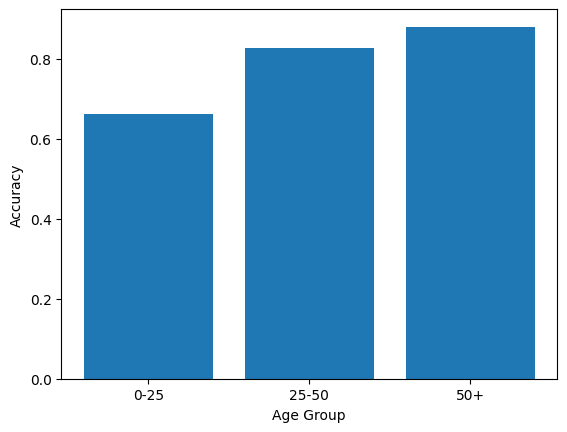

In [170]:
# Split results dataframe to three different dataframes
group_0_25 = results[results['AgeGroup'] == '0-25']
group_25_50 = results[results['AgeGroup'] == '25-50']
group_50_plus = results[results['AgeGroup'] == '50+']
# Print the dataframes
print(f"{group_0_25.head()}\n",
      f"{group_25_50.head()}\n",
      f"{group_50_plus.head()}\n")

# Create two lists for each Predicted Values and Actual Values for each dataframe, so in total 6 lists
#group_0_25
predicted_values_0_25 = group_0_25['Predicted Values'].tolist()
actual_values_0_25 = group_0_25['Actual Values'].tolist()
#group_25_50
predicted_values_25_50 = group_25_50['Predicted Values'].tolist()
actual_values_25_50 = group_25_50['Actual Values'].tolist()
#group_50_plus
predicted_values_50_plus = group_50_plus['Predicted Values'].tolist()
actual_values_50_plus = group_50_plus['Actual Values'].tolist()

# Calculate the accuracy of each group
accuracy_score_0_25 = accuracy_score(actual_values_0_25, predicted_values_0_25)
accuracy_score_25_50 = accuracy_score(actual_values_25_50, predicted_values_25_50)
accuracy_score_50_plus = accuracy_score(actual_values_50_plus, predicted_values_50_plus)

# Print the three accuracies
print(f"Accuracy of group 0-25: {accuracy_score_0_25*100:.2f}%")
print(f"Accuracy of group 25-50: {accuracy_score_25_50*100:.2f}%")
print(f"Accuracy of group 50+: {accuracy_score_50_plus*100:.2f}%")

#Visualize the three different accuracies
plt.bar(['0-25', '25-50', '50+'], [accuracy_score_0_25, accuracy_score_25_50, accuracy_score_50_plus])
plt.xlabel('Age Group')
plt.ylabel("Accuracy")
plt.show()


Ο ταξινομητής παρουσιάζει τρεις διαφορετικές ακρίβειες, προφανώς τα πηγαίνει καλύτερα στην κατηγορία των 50+ που είναι και λιγότερα τα δεδομένα συγκριτικά με τις άλλες κατηγορίες. Παρατηρείται ότι ο ταξινομητής έχει τη μικρότερη ακρίβεια στην κατηγορία 0-25, οπότε εκεί είναι πιο αναξιόπιστος συγκριτικά με τις άλλες δύο κατηγορίες ηλικιών. Συνεπώς δεν δουλεύει καλά για όλες τις ηλικίες ο ταξινομητής.

**Ερώτημα 8**